# Does Freedom Equal Happiness? - An Investigation of Factors Contributing to Happiness on a Global Scale

Many people often say that a major goal in their in life is to simply "be happy" and many important life decisions are made based almost solely on what will most likely make someone happier long term.  However, despite this central role that happiness plays in all of our lives, currently we are unable to directly measure "happiness" in humans or what contributes to an individual's happiness since what makes an individual happy can change based on endless factors that vary from individual to individual and in different circumstances.  One attempt at looking at happiness on a global scale is the World Happiness report, which was an attempt at estimating global happiness using data from the Gallup World Poll[1].  The happiness scores presented in this dataset are based on answers to the main life evaluation question that was asked in the poll which asked respondents to "think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale" (also known as the Cantril ladder).
    Since these happiness scores are globally representative, they can be used to delve further into which factors most often contribute to people's overall feelings of happiness in a global scale.  That is why this research is proposing to investigate if there is a correlation between the happiness scores obtained from the World Happiness report and global freedom scores obtained from the Cato Institutes Human Freedom Index (HFI), which is one of the most comprehensive indexes of freedoms on a global scale [2].  The HFI, released by the Cato institute in 2017 is a broad measure of human freedom, which they define simply as the "lack of coercive constraint".  To estimate human freedom, this study broke human freedom down into two subcategories; personal freedom and economic freedom, the values for which were determined from the subcategories below.
    - Rule of Law 
    - Security and Safety
    - Movement 
    - Religion
    - Association, Assembly, and Civil Society
    - Expression and Information
    - Identity and Relationships
    - Size of Government
    - Legal System and Property Rights
    - Access to Sound Money
    - Freedom to Trade Internationally
    - Regulation of Credit, Labor, and Business
The values for these subcategories were also determined by weighting a varying number of even more subcategories within the subcategories mentioned above (For a table showing all metrics used see this [link](https://www.doyouevendata.com/wp-content/uploads/2018/03/cato.gif)).  Essentially, what was done by this study was ranking each country on a scale of 1-10 in over 100 different categories and combining and weighting these categories to determine personal and economic freedom, which were then used to calculate human freedom.  The research proposed below hopes to add additional value to each of these datasets by combining them in order to delve further into trends between the happiness scores and how they are correlated with various types of freedoms from the HFI.

# Links to Datasets Used

[Cato Institutes Human Freedom Index](https://www.kaggle.com/doyouevendata/cato-2017-human-freedom-index/home)

[World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [13]:
# For the purposes of this research proposal, only the cato summary which includes only the final values for personal, economic, and human freedom will be used
# However, the variables included in the full index can be seen at the bottom of this notebook
freedom = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\Capstone_2\cato_2017_summary.csv')
happy_15 = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\Capstone_2\Happy Data\happy_2015.csv')

# Subset freedom data into only entries for the year 2015
free_15 = freedom[ freedom['Year'] == 2015] 

In [3]:
free_15.describe()

,Year,PERSONAL FREEDOM (Score),ECONOMIC FREEDOM (Score),HUMAN FREEDOM (Score),HUMAN FREEDOM (Rank),HUMAN FREEDOM (Quartile)
count,159.0,159.000000,159.000000,159.000000,159.000000,159.000000
mean,2015.0,7.067736,6.796855,6.932264,79.773585,2.503145
std,0.0,1.442425,0.914015,1.073753,46.060352,1.124380
min,2015.0,2.860000,2.920000,4.040000,1.000000,1.000000
25%,2015.0,6.025000,6.295000,6.335000,40.500000,1.500000
50%,2015.0,7.000000,6.890000,6.830000,78.000000,3.000000
75%,2015.0,8.245000,7.470000,7.850000,119.500000,3.500000
max,2015.0,9.470000,8.970000,8.890000,159.000000,4.000000


In [4]:
happy_15.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
# Show number of countries contained in each dataset
print("There are {} countries contained in the freedom dataset".format(len(free_15['Countries'])))
print("There are {} countries contained in the happiness dataset".format(len(happy_15['Country'])))

There are 159 countries contained in the freedom dataset
There are 158 countries contained in the happiness dataset


In [6]:
# Define function to count number of matching entries between dataset and display unmatched countries
def get_matches():
    count = 0
    matched = list()
    for hap in happy_15['Country']:
        for free in free_15['Countries']:
            if hap == free:
                count = count + 1
                matched.append(hap)
    print("There are {} matching entries in the 2 datasets".format(count))
    
# Determine ids for unmatched entries in each dataset
    unmatched_happy = list()
    for hap in happy_15['Country']:
         if hap in matched:
            pass
         else:
            unmatched_happy.append(hap)
    unmatched_free = list()
    for free in free_15['Countries']:
         if free in matched:
            pass
         else:
            unmatched_free.append(free)
# Print values to compare
    print('''
    The unmatched countries in the happiness dataset are.....
    ''')
    print(unmatched_happy)
    print('''
    The unmatched countries in the HFI dataset are.....
    ''')
    print(unmatched_free)
    print("")
    print("This leaves {} countries unmatched between the 2 datasets".format((len(unmatched_free)+len(unmatched_happy))))

In [7]:
get_matches()

There are 140 matching entries in the 2 datasets

    The unmatched countries in the happiness dataset are.....
    
['Uzbekistan', 'South Korea', 'Belarus', 'North Cyprus', 'Kosovo', 'Turkmenistan', 'Kyrgyzstan', 'Somaliland region', 'Palestinian Territories', 'Iraq', 'Sudan', 'Congo (Kinshasa)', 'Djibouti', 'Yemen', 'Congo (Brazzaville)', 'Comoros', 'Ivory Coast', 'Afghanistan']

    The unmatched countries in the HFI dataset are.....
    
['Bahamas', 'Barbados', 'Belize', 'Brunei Darussalam', 'Cape Verde', 'Congo, Democratic Republic of', 'Congo, Republic of', "Cote d'Ivoire", 'Fiji', 'Gambia, The', 'GuineaBissau', 'Guyana', 'Korea, Republic of', 'Kyrgyz Republic', 'Namibia', 'Papua New Guinea', 'Seychelles', 'TimorLeste', 'Yemen, Rep.']

This leaves 37 countries unmatched between the 2 datasets


In [14]:
# Fix countries that are entered with different names in each dataset

# Fix entries in freedom dataset
free_15.loc[:,'Countries'].replace('Kyrgyz Republic',value='Kyrgyzstan',inplace=True)
free_15.loc[:,'Countries'].replace('Korea, Republic of',value='South Korea',inplace=True)
free_15.loc[:,'Countries'].replace('Cote d\'Ivoire',value='Ivory Coast',inplace=True)
free_15.loc[:,'Countries'].replace('Yemen, Rep.',value='Yemen',inplace=True)

# Fix entries in happiness dataset
happy_15.loc[:,'Country'].replace('Congo (Kinshasa)',value='Congo, Democratic Republic of',inplace=True)
happy_15.loc[:,'Country'].replace('Congo (Brazzaville)',value='Congo, Republic of',inplace=True)

In [9]:
# Verify that names for countries above were reconciled
get_matches()

There are 146 matching entries in the 2 datasets

    The unmatched countries in the happiness dataset are.....
    
['Uzbekistan', 'Belarus', 'North Cyprus', 'Kosovo', 'Turkmenistan', 'Somaliland region', 'Palestinian Territories', 'Iraq', 'Sudan', 'Djibouti', 'Comoros', 'Afghanistan']

    The unmatched countries in the HFI dataset are.....
    
['Bahamas', 'Barbados', 'Belize', 'Brunei Darussalam', 'Cape Verde', 'Fiji', 'Gambia, The', 'GuineaBissau', 'Guyana', 'Namibia', 'Papua New Guinea', 'Seychelles', 'TimorLeste']

This leaves 25 countries unmatched between the 2 datasets


In [10]:
# Rename countries column in freedom dataset to country
free_15 = free_15.rename(columns = {'Countries':'Country'})

# Join datasets based on country
df = happy_15.merge(free_15,how='inner',on='Country')

# Print top 5 rows of dataframe to ensure join sucessful
df.head(n=5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,ISO_Code,PERSONAL FREEDOM (Score),ECONOMIC FREEDOM (Score),HUMAN FREEDOM (Score),HUMAN FREEDOM (Rank),HUMAN FREEDOM (Quartile)
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,CHE,9.33,8.44,8.89,1.0,1.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,ISL,9.01,7.23,8.12,31.0,1.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,DNK,9.36,7.77,8.56,8.0,1.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NOR,9.47,7.67,8.57,7.0,1.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,CAN,9.13,7.94,8.54,11.0,1.0


The output above shows that the join above was successful and that a total of 146 matching entries between the datasets that could potentially be used for the purposes of this study, meaning that there is a fairly representative sample size.  That is why this study has chosen to neglect the other 25 unmatched countries listed above and include only the 146 matching entries for the full study.  Next, using the code below I look closer at the distributions of the happiness scores obtained and compare these to the distributions of the freedom scores

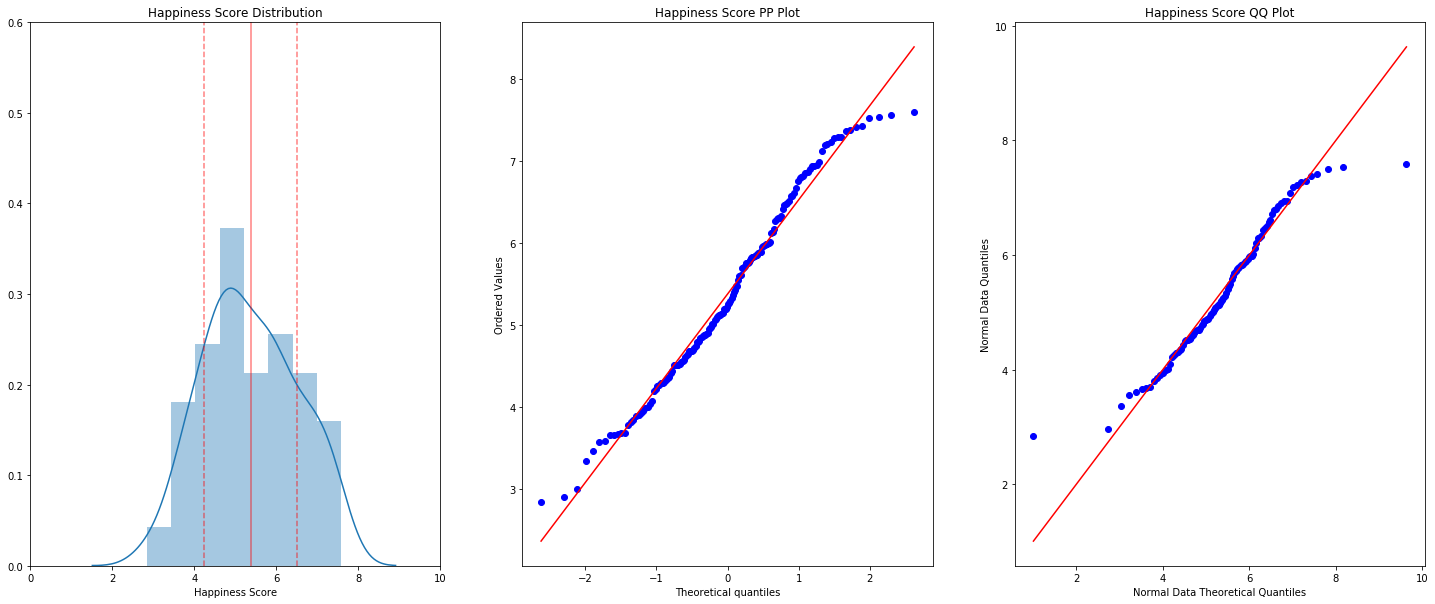

In [11]:
# Plot distribution of happiness scores on distplot and use PP plot to compare to normal distribution
figure = plt.figure(figsize=(25,10))

plt.subplot(131)
sns.distplot(happy_15['Happiness Score'])
plt.axvline(np.mean(happy_15['Happiness Score']),color='red',alpha=0.5)
plt.axvline((np.mean(happy_15['Happiness Score']) + np.std(happy_15['Happiness Score'])),color='red',linestyle='--',alpha=0.5)
plt.axvline((np.mean(happy_15['Happiness Score']) - np.std(happy_15['Happiness Score'])),color='red',linestyle='--',alpha=0.5)
plt.title("Happiness Score Distribution")
plt.xlim(0,10)
plt.ylim(0,0.6)

plt.subplot(132)
scipy.stats.probplot(x=happy_15['Happiness Score'],fit=True,plot=plt)
plt.title("Happiness Score PP Plot")

plt.subplot(133)
percs = np.linspace(0,100,100)
q_norm = np.percentile(np.random.normal(loc=happy_15['Happiness Score'].mean(),scale=happy_15['Happiness Score'].std(),size=(10000)),percs)
q_hap = np.percentile(happy_15['Happiness Score'],percs)
line = np.linspace(np.min((q_norm.min(),q_hap.min())), np.max((q_norm.max(),q_hap.max())))
plt.plot(q_norm,q_hap,ls="",marker="o",color='b')
plt.plot(line,line, color="red", ls="-")
plt.title("Happiness Score QQ Plot")
plt.xlabel("Normal Data Theoretical Quantiles")
plt.ylabel("Normal Data Quantiles")

plt.show()

Text(0.5, 1.0, 'Economic Freedom Scores PP Plot')

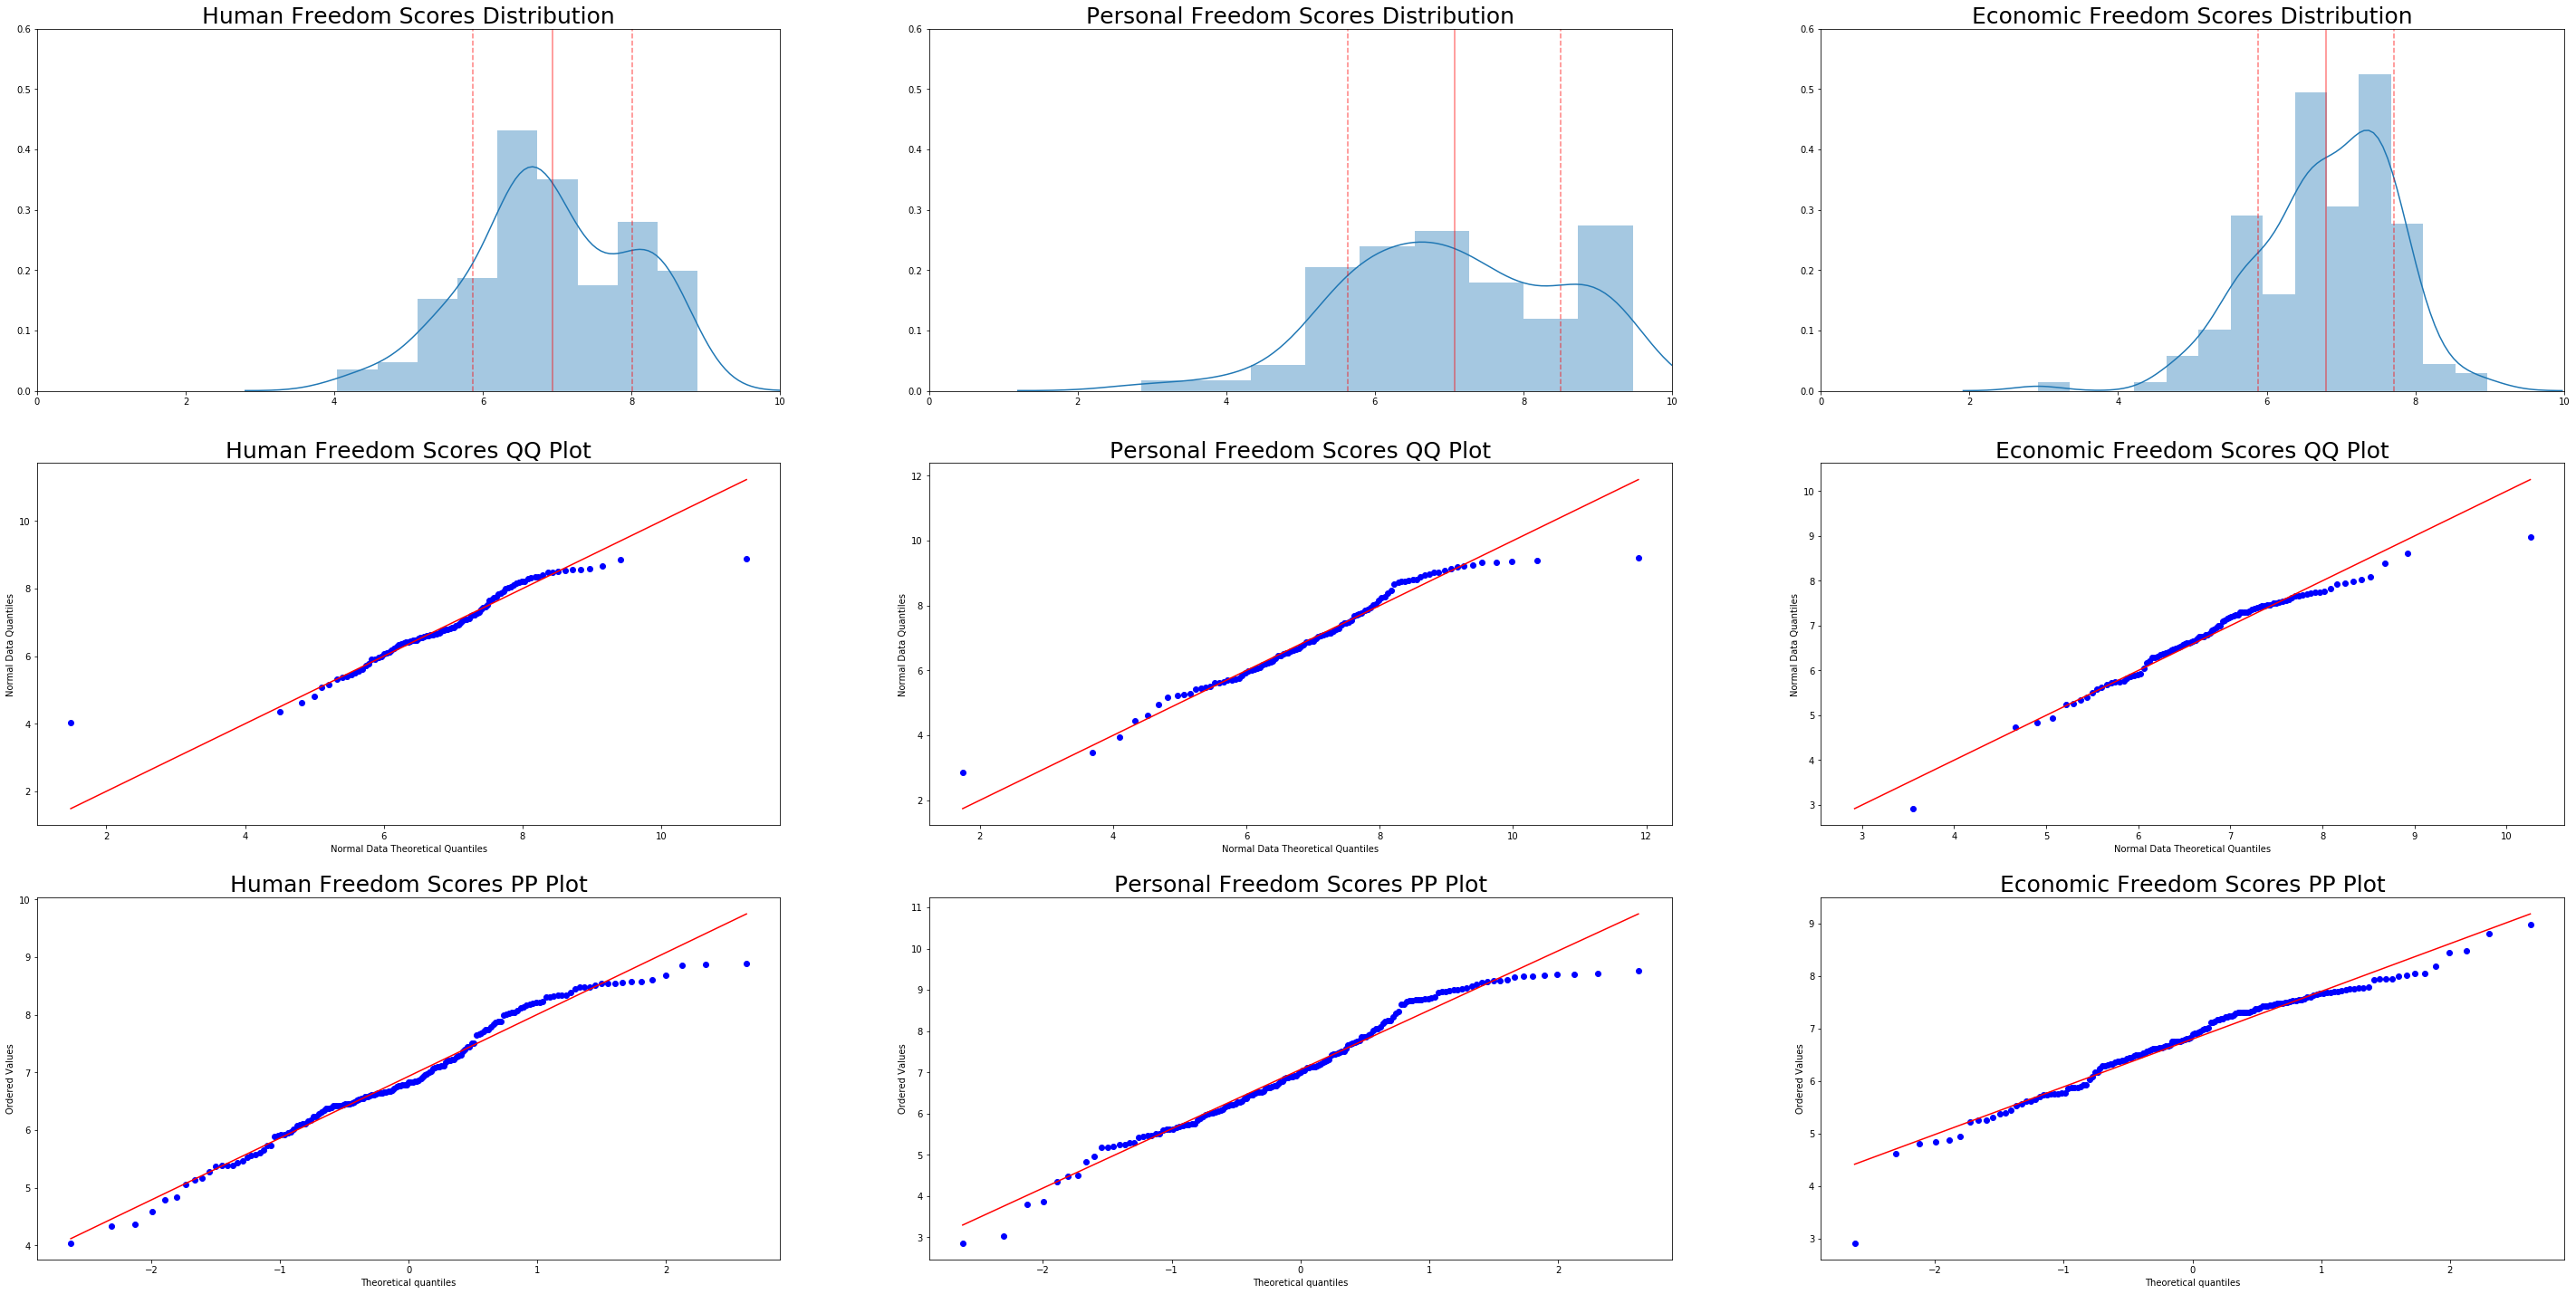

In [12]:
figure = plt.figure(figsize=(50,25))

plt.subplot(331)
sns.distplot(free_15['HUMAN FREEDOM (Score)'])
plt.axvline((np.mean(free_15['HUMAN FREEDOM (Score)']) + np.std(free_15['HUMAN FREEDOM (Score)'])),color='red',linestyle='--',alpha=0.5)
plt.axvline((np.mean(free_15['HUMAN FREEDOM (Score)']) - np.std(free_15['HUMAN FREEDOM (Score)'])),color='red',linestyle='--',alpha=0.5)
plt.axvline(np.mean(free_15['HUMAN FREEDOM (Score)']),color='red',alpha=0.5)
plt.title("Human Freedom Scores Distribution",size=25)
plt.xlabel('')
plt.xlim(0,10)
plt.ylim(0,0.6)

plt.subplot(332)
sns.distplot(free_15['PERSONAL FREEDOM (Score)'])
plt.axvline((np.mean(free_15['PERSONAL FREEDOM (Score)']) + np.std(free_15['PERSONAL FREEDOM (Score)'])),color='red',linestyle='--',alpha=0.5)
plt.axvline((np.mean(free_15['PERSONAL FREEDOM (Score)']) - np.std(free_15['PERSONAL FREEDOM (Score)'])),color='red',linestyle='--',alpha=0.5)
plt.axvline(np.mean(free_15['PERSONAL FREEDOM (Score)']),color='red',alpha=0.5)
plt.title("Personal Freedom Scores Distribution",size=25)
plt.xlabel('')
plt.xlim(0,10)
plt.ylim(0,0.6)

plt.subplot(333)
sns.distplot(free_15['ECONOMIC FREEDOM (Score)'])
plt.axvline((np.mean(free_15['ECONOMIC FREEDOM (Score)']) + np.std(free_15['ECONOMIC FREEDOM (Score)'])),color='red',linestyle='--',alpha=0.5)
plt.axvline((np.mean(free_15['ECONOMIC FREEDOM (Score)']) - np.std(free_15['ECONOMIC FREEDOM (Score)'])),color='red',linestyle='--',alpha=0.5)
plt.axvline(np.mean(free_15['ECONOMIC FREEDOM (Score)']),color='red',alpha=0.5)
plt.title("Economic Freedom Scores Distribution",size=25)
plt.xlabel('')
plt.xlim(0,10)
plt.ylim(0,0.6)

plt.subplot(334)
q_norm = np.percentile(np.random.normal(loc=free_15['HUMAN FREEDOM (Score)'].mean(),scale=free_15['HUMAN FREEDOM (Score)'].std(),size=(10000)),percs)
q_hum = np.percentile(free_15['HUMAN FREEDOM (Score)'],percs)
line = np.linspace(np.min((q_norm.min(),q_hum.min())), np.max((q_norm.max(),q_hum.max())))
plt.plot(q_norm,q_hum,ls="",marker="o",color='b')
plt.plot(line,line, color="red", ls="-")
plt.title("Human Freedom Scores QQ Plot",size=25)
plt.xlabel("Normal Data Theoretical Quantiles")
plt.ylabel("Normal Data Quantiles")

plt.subplot(335)
q_norm = np.percentile(np.random.normal(loc=free_15['PERSONAL FREEDOM (Score)'].mean(),scale=free_15['PERSONAL FREEDOM (Score)'].std(),size=(10000)),percs)
q_per = np.percentile(free_15['PERSONAL FREEDOM (Score)'],percs)
line = np.linspace(np.min((q_norm.min(),q_per.min())), np.max((q_norm.max(),q_per.max())))
plt.plot(q_norm,q_per,ls="",marker="o",color='b')
plt.plot(line,line, color="red", ls="-")
plt.title("Personal Freedom Scores QQ Plot",size=25)
plt.xlabel("Normal Data Theoretical Quantiles")
plt.ylabel("Normal Data Quantiles")

plt.subplot(336)
q_norm = np.percentile(np.random.normal(loc=free_15['ECONOMIC FREEDOM (Score)'].mean(),scale=free_15['ECONOMIC FREEDOM (Score)'].std(),size=(10000)),percs)
q_eco = np.percentile(free_15['ECONOMIC FREEDOM (Score)'],percs)
line = np.linspace(np.min((q_norm.min(),q_eco.min())), np.max((q_norm.max(),q_eco.max())))
plt.plot(q_norm,q_eco,ls="",marker="o",color='b')
plt.plot(line,line, color="red", ls="-")
plt.title("Economic Freedom Scores QQ Plot",size=25)
plt.xlabel("Normal Data Theoretical Quantiles")
plt.ylabel("Normal Data Quantiles")

plt.subplot(337)
scipy.stats.probplot(x=free_15['HUMAN FREEDOM (Score)'],fit=True,plot=plt)
plt.title("Human Freedom Scores PP Plot",size=25)

plt.subplot(338)
scipy.stats.probplot(x=free_15['PERSONAL FREEDOM (Score)'],fit=True,plot=plt)
plt.title("Personal Freedom Scores PP Plot",size=25)

plt.subplot(339)
scipy.stats.probplot(x=free_15['ECONOMIC FREEDOM (Score)'],fit=True,plot=plt)
plt.title("Economic Freedom Scores PP Plot",size=25)
         

Based on the results above, all of the four datasets seem to be distributed fairly normally based on the behavior of the QQ and PP plots above.  However, while the mean of the happiness scores falls almost right on 5, the other 3 variables corresponding to each of the final freedom scores calculated seem to all be somewhat right skewed which is something to consider when building the proposed model for this study.

Next, I used the code below to write a simple function to determine the top ten most happy countries in the world based on the happiness scores obtained, and compare the countries in this list to the top ten countries in term of economic, personal, and human freedom scores to see if there is any overlap

In [13]:
# Write function to get list of top ten/bottom ten countries from each category
def top_ten(column):
    data = df.sort_values(by=column,ascending=False)
    return list(data['Country'].head(n=10))
def bottom_ten(column):
    data = df.sort_values(by=column,ascending=False)
    return list(data['Country'].tail(n=10))

# Apply function to get top countries in terms of happiness scores
most_happy = top_ten("Happiness Score")
least_happy = bottom_ten("Happiness Score")

# Write function to return entries also contained in the top ten most happy countries
def in_most_happy(freedom_type):
    return [word for word in freedom_type if word in most_happy]
def in_least_happy(freedom_type):
    return[word for word in freedom_type if word in least_happy]

# Get top ten/bottom in terms of various freedoms
personal_t = top_ten("PERSONAL FREEDOM (Score)")
economic_t = top_ten("ECONOMIC FREEDOM (Score)")
human_t = top_ten("HUMAN FREEDOM (Score)")
personal_b = bottom_ten("PERSONAL FREEDOM (Score)")
economic_b = bottom_ten("ECONOMIC FREEDOM (Score)")
human_b = bottom_ten("HUMAN FREEDOM (Score)")

In [37]:
print('''
The countries with the top 10 highest happiness scores are.....
''')
print(most_happy)
print('')
print("Of these the {} below are contained in the top ten countries in terms of personal freedom scores".format(len(in_most_happy(personal_t))))
print(in_most_happy(personal_t))
print('')
print("Of these the {} below are contained in the top ten countries in terms of economic freedom scores".format(len(in_most_happy(economic_t))))
print(in_most_happy(economic_t))
print('')
print("Of these the {} below are contained in the top ten countries in terms of human freedom scores".format(len(in_most_happy(human_t))))
print(in_most_happy(human_t))


The countries with the top 10 highest happiness scores are.....

['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland', 'Netherlands', 'Sweden', 'New Zealand', 'Australia']

Of these the 8 below are contained in the top ten countries in terms of personal freedom scores
['Norway', 'Finland', 'Netherlands', 'Denmark', 'Switzerland', 'Sweden', 'New Zealand', 'Australia']

Of these the 3 below are contained in the top ten countries in terms of personal freedom scores
['New Zealand', 'Switzerland', 'Australia']

Of these the 7 below are contained in the top ten countries in terms of human freedom scores
['Switzerland', 'New Zealand', 'Australia', 'Finland', 'Norway', 'Denmark', 'Netherlands']


In [38]:
print('''
The countries with the bottom 10 happiness scores are.....
''')
print(least_happy)
print('')
print("Of these the {} below are contained in the bottom ten countries in terms of personal freedom scores".format(len(in_least_happy(personal_b))))
print(in_least_happy(personal_b))
print('')
print("Of these the {} below are contained in the bottom ten countries in terms of economic freedom scores".format(len(in_least_happy(economic_b))))
print(in_least_happy(economic_b))
print('')
print("Of these the {} below are contained in the bottom ten countries in terms of human freedom scores".format(len(in_least_happy(human_b))))
print(in_least_happy(human_b))


The countries with the bottom 10 happiness scores are.....

['Central African Republic', 'Chad', 'Guinea', 'Ivory Coast', 'Burkina Faso', 'Rwanda', 'Benin', 'Syria', 'Burundi', 'Togo']

Of these the 2 below are contained in the bottom ten countries in terms of personal freedom scores
['Burundi', 'Syria']

Of these the 3 below are contained in the bottom ten countries in terms of personal freedom scores
['Chad', 'Syria', 'Central African Republic']

Of these the 3 below are contained in the bottom ten countries in terms of human freedom scores
['Burundi', 'Central African Republic', 'Syria']


Based on the data above, there is some overlap between the top and bottom countries in terms of happiness scores and freedom scores, with New Zealand and Switzerland being contained somewhere in the top ten for all categories considered, and Burundi and Syria being contained in the bottom ten for all categories considered.   Furthermore,  based on overlap between the personal and human freedom scores, it can be assumed that the model used in calculating freedom scores most likely weighted personal freedom more heavily than economic freedom (since a combination of the 2 was used to calculate the human freedom scores).  To investigate this further I used the code below to explore some of the correlations in the joined dataset.

In [41]:
# Collect columns of interest 
data = df[['Happiness Score','HUMAN FREEDOM (Score)','PERSONAL FREEDOM (Score)','ECONOMIC FREEDOM (Score)']]

In [42]:
# print correlation table
data.corr()

,Happiness Score,HUMAN FREEDOM (Score),PERSONAL FREEDOM (Score),ECONOMIC FREEDOM (Score)
Happiness Score,1.000000,0.581452,0.558744,0.488791
HUMAN FREEDOM (Score),0.581452,1.000000,0.946828,0.862835
PERSONAL FREEDOM (Score),0.558744,0.946828,1.000000,0.654337
ECONOMIC FREEDOM (Score),0.488791,0.862835,0.654337,1.000000


In [43]:
# print covariance table
data.cov()

,Happiness Score,HUMAN FREEDOM (Score),PERSONAL FREEDOM (Score),ECONOMIC FREEDOM (Score)
Happiness Score,1.358098,0.751803,0.966060,0.537432
HUMAN FREEDOM (Score),0.751803,1.230978,1.558553,0.903206
PERSONAL FREEDOM (Score),0.966060,1.558553,2.201158,0.915928
ECONOMIC FREEDOM (Score),0.537432,0.903206,0.915928,0.890160


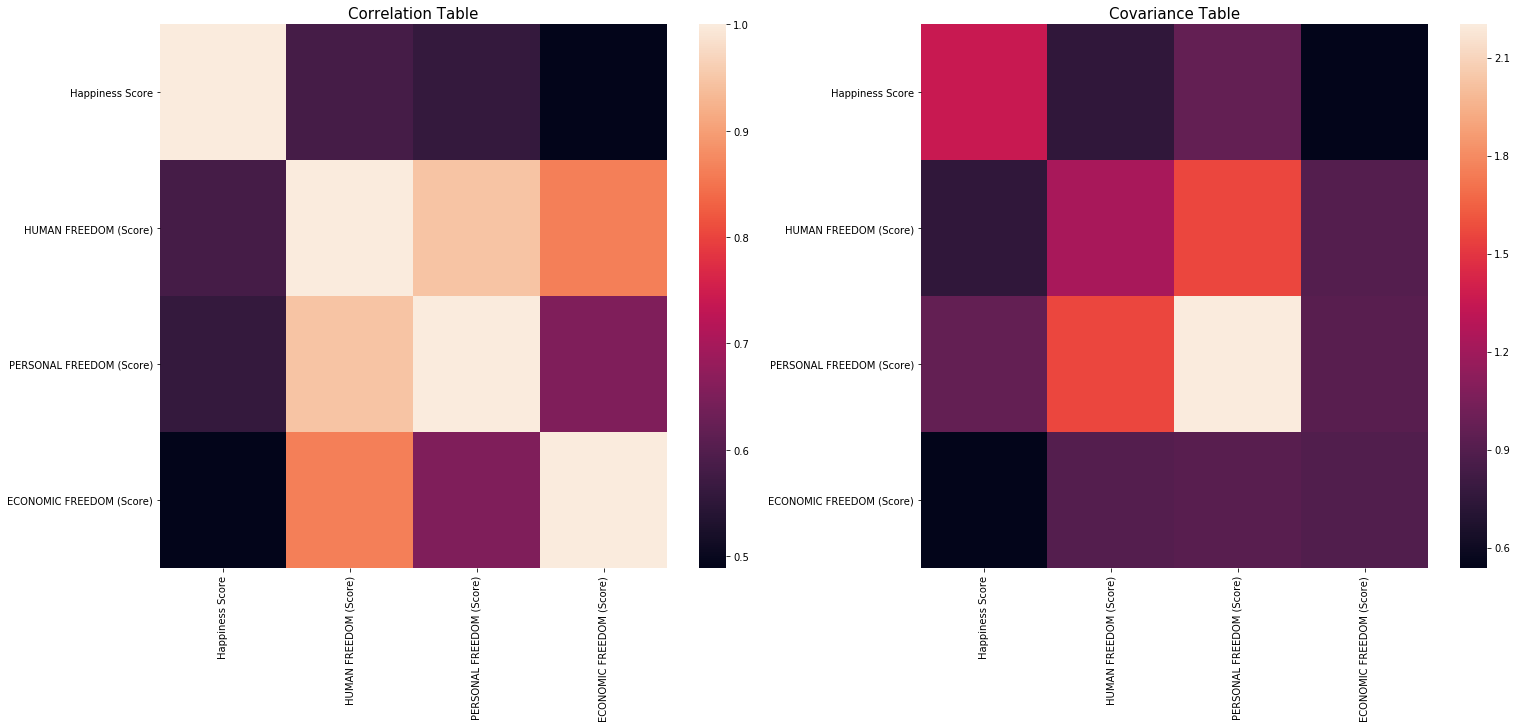

In [44]:
# Plot heatmap using correlation matrix or covariance matrix
figure = plt.figure(figsize=(25,10))

plt.subplot(121)
plt.title("Correlation Table",size=15)
sns.heatmap(data.corr())

plt.subplot(122)
plt.title("Covariance Table",size=15)
sns.heatmap(data.cov())

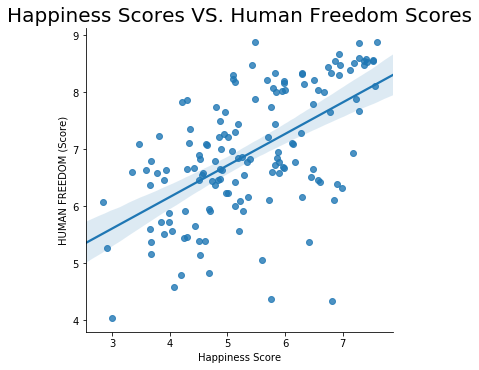

In [45]:
# Display trend lines happiness score vs human freedom scores
plt1= sns.lmplot(x='Happiness Score',
          y='HUMAN FREEDOM (Score)',
          data=data)
plt.title("Happiness Scores VS. Human Freedom Scores",size=20)
plt.show()

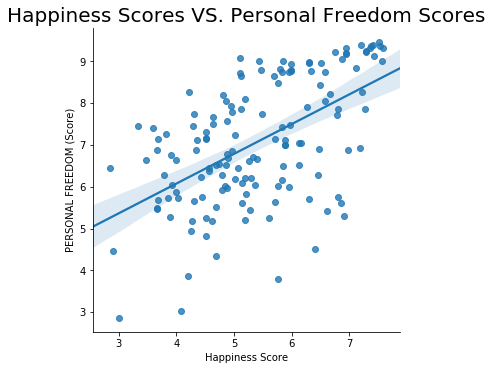

In [46]:
# Display trend lines happiness score vs personal freedom scores
sns.lmplot(x='Happiness Score',
          y='PERSONAL FREEDOM (Score)',
          data=data)
plt.title("Happiness Scores VS. Personal Freedom Scores",size=20)
plt.show()

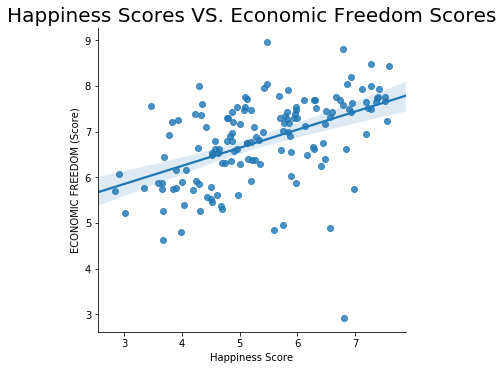

In [47]:
# Display trend lines happiness score vs economic freedom scores
sns.lmplot(x='Happiness Score',
          y='ECONOMIC FREEDOM (Score)',
          data=data)
plt.title("Happiness Scores VS. Economic Freedom Scores",size=20)
plt.show()

Based on the data above, the happiness scores show the highest correlation with the human freedom scores, and a slightly lesser correlation with the economic freedom scores as mentioned above.  Furthermore, while there is some trend between the happiness scores and the various freedom scores the trend is much less defined than I would have anticipated.  However, I believe that the happiness scores will show a much stronger correlation with some of the full list of individual metrics (see below) contained in the human freedom index and were used to calculate the various freedom scores seen above.

In [48]:
# Read in the human freedom index and print columns in human freedom index
hfi = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\Capstone_2\cato_2017_index.csv')
hfi_cols = list(hfi.columns)
print(hfi_cols)

['ISO_Code', 'Countries', 'Procedural Justice', 'Civil Justice', 'Criminal Justice', 'Rule of Law', 'Homicide', 'Disappearances', 'Violent Conflicts', 'Organised Conflicts', 'Terrorism Fatalities', 'Terrorism Injuries', 'Disapperances  Conflicts and Terrorism', 'Female Genital Mutilation', 'Missing Women', 'Inheritance Rights: Widows', 'Inheritance Rights: Daughters', 'Inheritance Rights', 'Womens Security & Safety', 'Security & Safety', 'Domestic Movement', 'Foreign Movement', 'Womens Movement', 'Movement', 'Establishing and Operating Religious Organizations', 'Harassment and Physical Hostilities', 'Legal and Regulatory Restrictions', 'Religion', 'Association', 'Assembly', 'Political Parties', 'Professional Organizations', 'Educational Sporting and Cultural Organizations', 'Establishing and Operating Organizations', 'Association Assembly & Civil Society', 'Press Killed', 'Press Jailed', 'Laws and Regulations that Influence Media Content', 'Political Pressures and Controls on Media Con

# Research Proposed
    Based on the data above there is most likely some interaction between the freedom scores and the happiness scores.  The full study proposed hopes to look further into this to determine which metrics used in calculating the freedom scores correlate most strongly with the data.  This will be done in a way similar to the way the freedom scores were originally calculated; by using a principal component analysis (PCA) to compress down the ~100 variables into a more manageable number of components.  However,  this study will do this after joining the happiness scores to this dataset so that the strength of the correlation between the happiness scores and each of the variables above can be further investigated with the goal of giving further insight into which of these factors are most closely linked with happiness.
    Next, if the PCA is able to compress these categories down into a number amenable to a multivariate linear regression this study hopes to use the results of this to build a model that can predict whether a country would be considered more happy or less happy on average (eg. happiness scores >5 and <5 respectively) based on the freedoms that they have in their country.  Furthermore, if this study is able to successfully create a multivariate linear model, this model could be used to get an even better picture of the strength of the correlation between each of the factors in the human freedom index and the happiness scores.
         
# Metrics for Success/Failure 
    This study will assess the quality of the results obtained, first by the number of individual components that the PCA is able to compress the ~100 variables above into, as well as the strength of the correlations to happiness scores within these categories.  Next, if this study is able to successfully compress these variables down to a smaller number of components amenable to a multivariate linear regression, these components will be used to build a model to predict whether a country will be considered happy overall or unhappy overall (eg. happiness scores >5 and <5 respectively), and the success of the model will be evaluated by the accuracy of this model when fed the freedom scores from a different year of the study.  Finally, this model will also be evaluated by the strength of the trends (eg. R^2 values) produced by the multivariate regression.
    
# Null Hypothesis (Ho)
    The metrics used in calculating the personal, economic, and human freedom scores will show no significant correlations with the happiness scores.
    
# Hypothesis (Ha)
    I believe that many of the metrics used in calculating personal freedom will show much stronger correlations to the happiness scores than the metrics used in calculating the economic freedom scores.